# Predicting Similar Movies using Machine Learning

# 1. Problem Definition
In a statement,

Given a movie title/name, can we predict similar movies related to it?

# 2. Data
The original data is taken from the MovieLens website.
https://grouplens.org/datasets/movielens/100k/


# Preparing the tools
We're going to use pandas, Matplotlib, seaborn and NumPy for data analysis and manipulation.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Load data

In [3]:
columns = ["user_id","item_id","rating","timestamp"]
df = pd.read_csv("u.data",sep="\t",names = columns)

In [4]:
movie_titles_df = pd.read_csv("u.item",sep = "\|",header = None)
movie_titles = movie_titles_df.iloc[:,:2]
movie_titles_columnNames = ["item_id","movie_name"]
movie_titles.columns = movie_titles_columnNames

C:\Users\vinay\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [83]:
movie_titles.head()

,item_id,movie_name
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [6]:
ratings = pd.merge(df,movie_titles,on="item_id")

In [84]:
ratings.head()

,user_id,item_id,rating,timestamp,movie_name
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


# Data Exploration (exploratory data analysis or EDA)

In [85]:
ratings.dtypes

user_id        int64
item_id        int64
rating         int64
timestamp      int64
movie_name    object
dtype: object

In [86]:
movie_titles.dtypes

item_id        int64
movie_name    object
dtype: object

In [95]:
# grouping the movies together, based on the title, to find the average ratings of the movies individually.
ratings.groupby("movie_name").mean()["rating"].sort_values(ascending=False).head()

movie_name
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [96]:
# grouping the movies together, based on the title, to fing the no of ratings associated wit it
ratings.groupby("movie_name").count()["rating"].sort_values(ascending=False).head()

movie_name
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [89]:
final_ratings_df = pd.DataFrame(ratings.groupby("movie_name").mean()["rating"])

In [91]:
final_ratings_df.head()


,rating
movie_name,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [92]:
final_ratings_df["no of ratings"] = pd.DataFrame(ratings.groupby("movie_name").count()["rating"])

In [97]:
# sorting the data frame by rating
final_ratings_df.sort_values(by="rating",ascending=False).head()

,rating,no of ratings
movie_name,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3


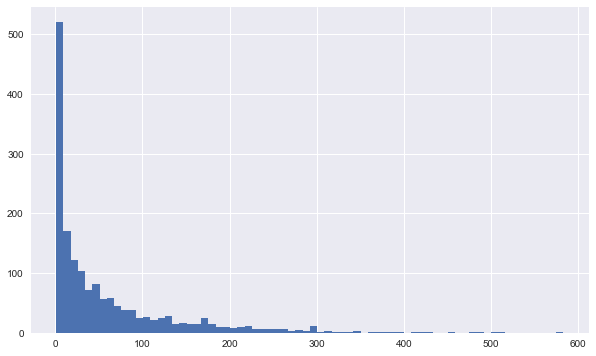

In [25]:
plt.style.use("seaborn")
plt.figure(figsize=(10,6))
plt.hist(final_ratings_df["no of ratings"],bins=70)
plt.show();

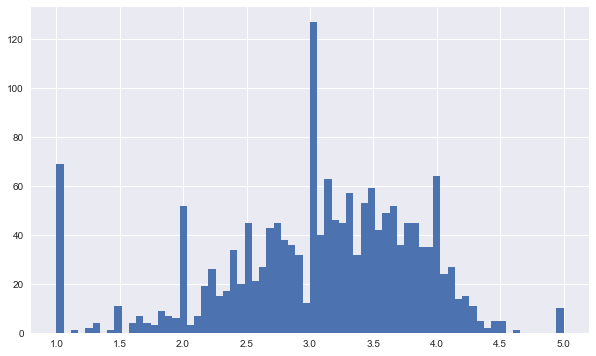

In [30]:
plt.figure(figsize=(10,6))
plt.hist(final_ratings_df["rating"],bins=70);

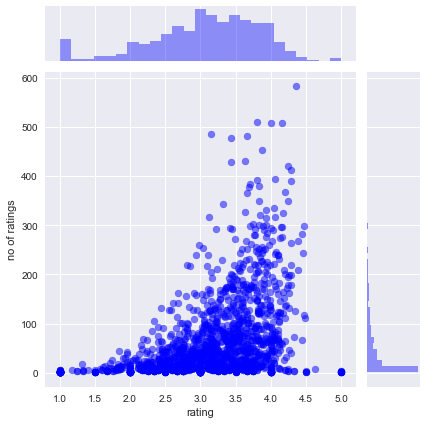

In [38]:
sns.jointplot(x=final_ratings_df["rating"] ,y=final_ratings_df["no of ratings"],data = final_ratings_df,alpha=0.5,color="blue")

# Creating Movie Recommendation

In [39]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [41]:
matrix = ratings.pivot_table(index = "user_id",columns = "movie_name",values = "rating")

In [98]:
matrix.head()

movie_name,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [99]:
ratings.groupby("movie_name").count()["rating"].sort_values(ascending=False).head()

movie_name
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [101]:
# running the prediction on starWars because, it is the top rated movie in the data Frame
matrix["Star Wars (1977)"].head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [102]:
starWars_user_rating = matrix["Star Wars (1977)"]

In [103]:
starWars_user_rating.head()


user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

#### Using Correlation to find the similar Movies

In [122]:
similar_to_starWars = matrix.corrwith(starWars_user_rating)

C:\Users\vinay\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\vinay\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [123]:
similar_to_starWars.head()


movie_name
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [124]:
corr_starWars = pd.DataFrame(similar_to_starWars,columns=["correlation"])

In [125]:
corr_starWars.head()

,correlation
movie_name,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [126]:
corr_starWars.dropna(inplace = True)

In [131]:
corr_starWars.head()

,correlation
movie_name,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [128]:
corr_starWars.sort_values("correlation",ascending=False).head(10)

,correlation
movie_name,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [130]:
corr_starWars.head()

,correlation
movie_name,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [132]:
final_ratings_df.head()

,rating,no of ratings
movie_name,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [113]:
corr_starWars = corr_starWars.join(final_ratings_df["no of ratings"])

In [114]:
corr_starWars.head(10)

,correlation,no of ratings
movie_name,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
2 Days in the Valley (1996),0.066654,93
"20,000 Leagues Under the Sea (1954)",0.289768,72
2001: A Space Odyssey (1968),0.230884,259
"39 Steps, The (1935)",0.106453,59


In [115]:
corr_starWars[corr_starWars["no of ratings"]>100].sort_values("correlation",ascending = False)

,correlation,no of ratings
movie_name,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


# Predict Function
* the main function that predicts the movies that are highly correlated with it.

In [133]:
def predictMovies(movie_title):
    movie_title_user_rating = matrix[movie_title]
    similar_to_movie_title = matrix.corrwith(movie_title_user_rating)
    
    corr_movie = pd.DataFrame(similar_to_movie_title,columns=["correlation"])
    corr_movie.dropna(inplace = True)
    
    corr_movie = corr_movie.join(final_ratings_df["no of ratings"])
    predictions = corr_movie[corr_movie["no of ratings"]>100].sort_values("correlation",ascending = False)
    
    return predictions

In [134]:
predictions = predictMovies("Titanic (1997)")

C:\Users\vinay\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\vinay\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [135]:
predictions.head()

,correlation,no of ratings
movie_name,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208


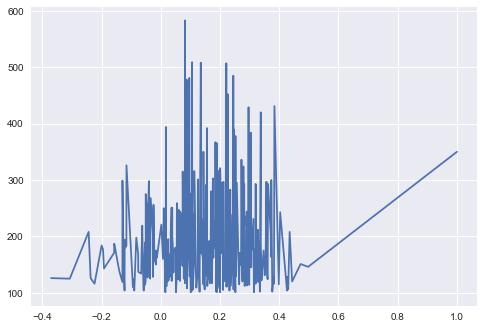

In [119]:
plt.plot(predictions["correlation"],predictions["no of ratings"])